In [144]:
#Import needed libraries
import pandas as pd
import numpy as np
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [78]:
#Import data
data=pd.read_csv("C:/Users/80214178/Downloads/Mall_Customers.csv")

In [201]:
data.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Female', 'Male',
       'kmeans', 'aggclu', 'optics'],
      dtype='object')

In [80]:
#Make dummy variables
data=pd.concat([data.iloc[:,2:], pd.get_dummies(data['Gender'])], axis=1)
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


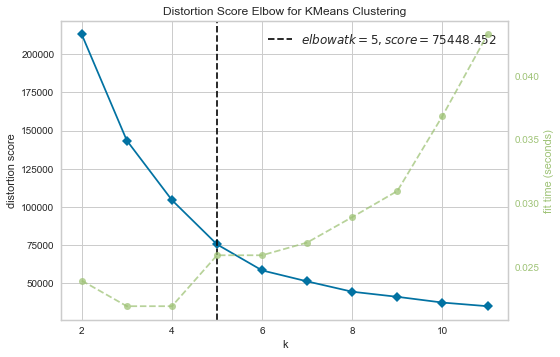

In [81]:
#Elbow method with kmeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(data)       
visualizer.show()   


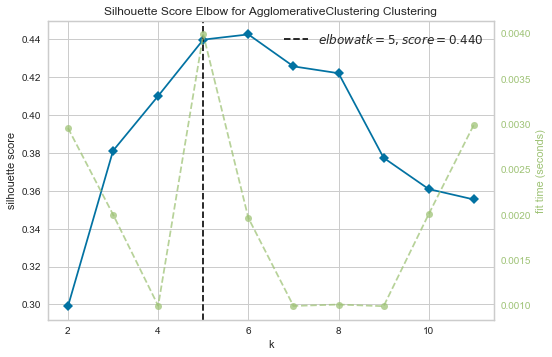

In [140]:
#Silhouette method with AggCl
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,12),metric='silhouette')
visualizer.fit(data)       
visualizer.show()   


In [156]:
#Fit clustering algorithms

#k-means
kmeans = KMeans(n_clusters =5 )
kmean_indices = kmeans.fit_predict(data)

#Aglomerative Clustering
AGCl = AgglomerativeClustering(n_clusters =5 )
AGCl_indices = AGCl.fit_predict(data)

#Optics
optics_model = OPTICS(min_samples = 10) 
optics_model.fit(data)


OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=None, min_samples=10, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

Text(0.5, 1.0, 'Optics, min_samples=10')

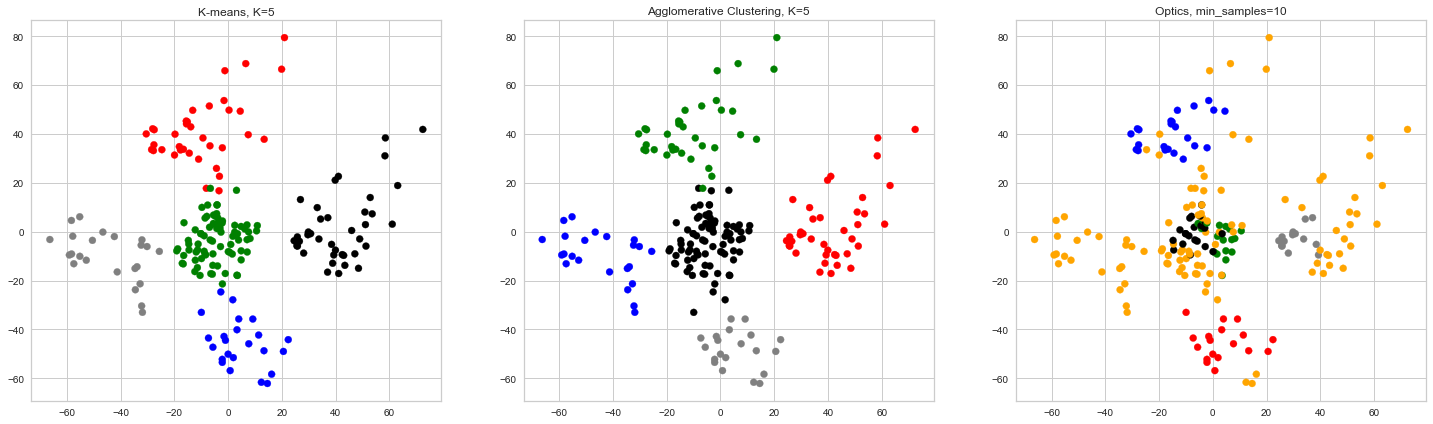

In [155]:
# Defining the framework of the visualization 
plt.figure(figsize =(25,7)) 
G = gridspec.GridSpec(1, 3) 
ax2 = plt.subplot(G[0, 0]) 
ax3 = plt.subplot(G[0, 1]) 
ax4 = plt.subplot(G[0, 2]) 

#Compute PCA for visualization
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(data)

colors = ['black', 'green','red','gray','blue','yellow','pink','orange']

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

#Plot
#Kmeans
ax2.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])
ax2.set_title('K-means, K=5') 

#Agglomerative Clustering
ax3.scatter(x_axis, y_axis, c=[colors[d] for d in AGCl_indices])
ax3.set_title('Agglomerative Clustering, K=5') 

#Optics
ax4.scatter(x_axis, y_axis, c=[colors[d] for d in optics_model.labels_])
ax4.set_title('Optics, min_samples=10') 



In [163]:
#Results 
data['kmeans'],data['aggclu'],data['optics']=[kmean_indices,AGCl_indices,optics_model.labels_]

In [198]:
Kmeasdata=data.groupby('kmeans').mean().drop(columns=['aggclu','optics'])
AGGCLudata=data.groupby('aggclu').mean().drop(columns=['kmeans','optics'])
opticsdata=data.groupby('optics').mean().drop(columns=['kmeans','aggclu']).iloc[1:6,]

Text(0, 0.5, 'Percentage')

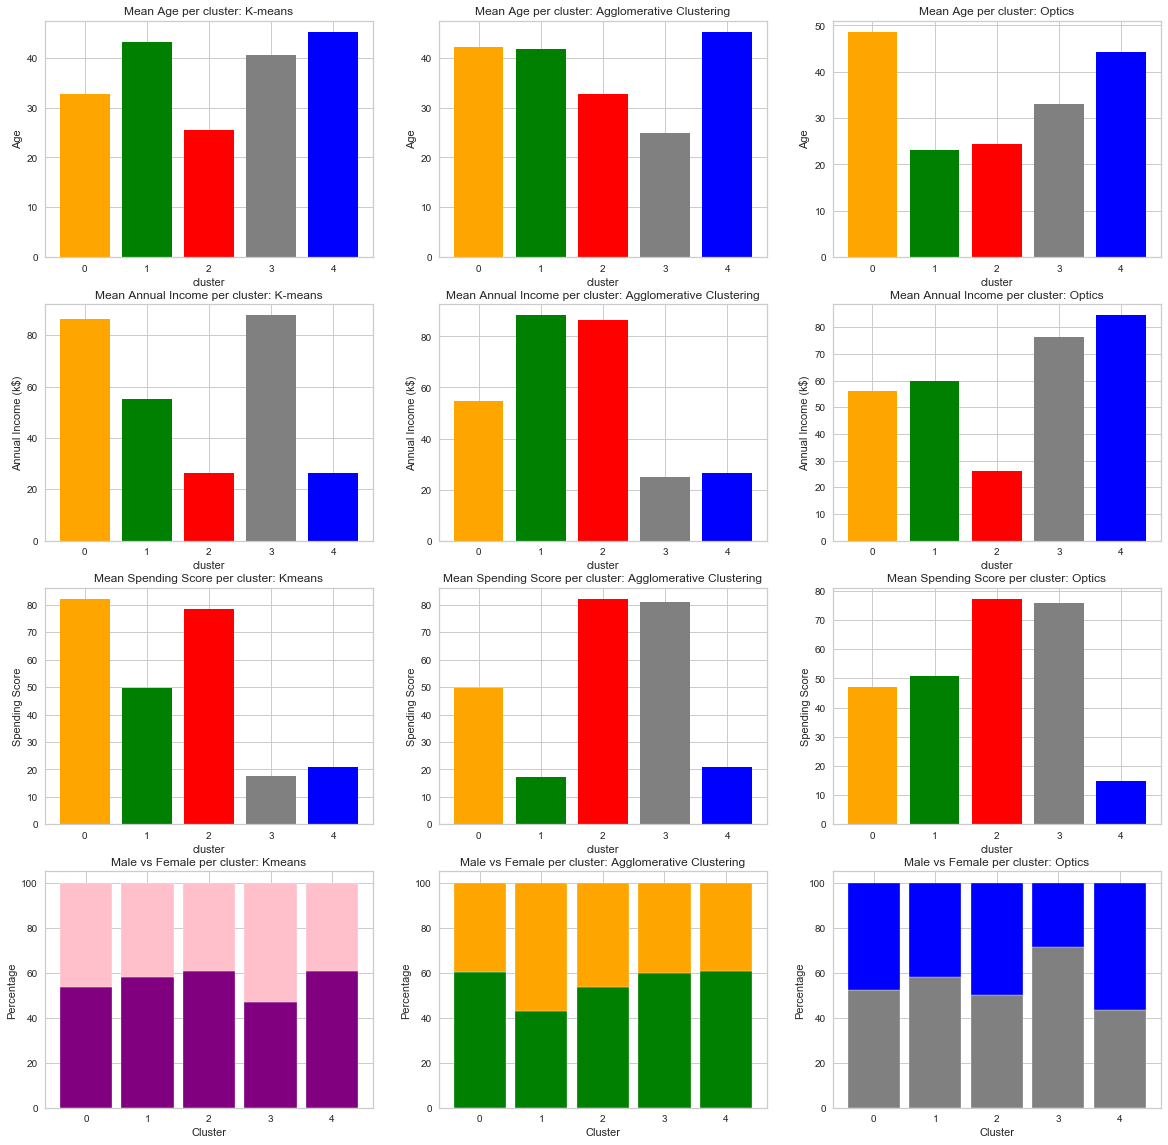

In [250]:
# Defining the framework of the visualization 
plt.figure(figsize =(20,20)) 
G = gridspec.GridSpec(4, 3) 
ax2 = plt.subplot(G[0, 0]) 
ax3 = plt.subplot(G[0, 1]) 
ax4 = plt.subplot(G[0, 2]) 
ax5 = plt.subplot(G[1, 0]) 
ax6 = plt.subplot(G[1, 1]) 
ax7 = plt.subplot(G[1, 2]) 
ax8 = plt.subplot(G[2, 0]) 
ax9 = plt.subplot(G[2, 1]) 
ax10 = plt.subplot(G[2, 2]) 
ax11 = plt.subplot(G[3, 0]) 
ax12= plt.subplot(G[3, 1]) 
ax13 = plt.subplot(G[3, 2]) 

clusters = [0, 1,2, 3, 4]

#--------------------AGE
#Kmeans
ax2.bar(clusters, Kmeasdata['Age'],color=('orange', 'green','red','gray','blue'))
ax2.set_xlabel('cluster')
ax2.set_ylabel('Age')
ax2.set_title('Mean Age per cluster: K-means')

#Aggclu
ax3.bar(clusters, AGGCLudata['Age'],color=('orange', 'green','red','gray','blue'))
ax3.set_xlabel('cluster')
ax3.set_ylabel('Age')
ax3.set_title('Mean Age per cluster: Agglomerative Clustering')

#Optics
ax4.bar(clusters, opticsdata['Age'],color=('orange', 'green','red','gray','blue'))
ax4.set_xlabel('cluster')
ax4.set_ylabel('Age')
ax4.set_title('Mean Age per cluster: Optics')

#----------------Annual Income (k$)

#Kmeans
ax5.bar(clusters, Kmeasdata['Annual Income (k$)'],color=('orange', 'green','red','gray','blue'))
ax5.set_xlabel('cluster')
ax5.set_ylabel('Annual Income (k$)')
ax5.set_title('Mean Annual Income per cluster: K-means')

#Aggclu
ax6.bar(clusters, AGGCLudata['Annual Income (k$)'],color=('orange', 'green','red','gray','blue'))
ax6.set_xlabel('cluster')
ax6.set_ylabel('Annual Income (k$)')
ax6.set_title('Mean Annual Income per cluster: Agglomerative Clustering')

#Optics
ax7.bar(clusters, opticsdata['Annual Income (k$)'],color=('orange', 'green','red','gray','blue'))
ax7.set_xlabel('cluster')
ax7.set_ylabel('Annual Income (k$)')
ax7.set_title('Mean Annual Income per cluster: Optics')

#----------------Spending Score (1-100)

#Kmeans
ax8.bar(clusters, Kmeasdata['Spending Score (1-100)'],color=('orange', 'green','red','gray','blue'))
ax8.set_xlabel('cluster')
ax8.set_ylabel('Spending Score')
ax8.set_title('Mean Spending Score per cluster: Kmeans')

#Aggclu
ax9.bar(clusters, AGGCLudata['Spending Score (1-100)'],color=('orange', 'green','red','gray','blue'))
ax9.set_xlabel('cluster')
ax9.set_ylabel('Spending Score')
ax9.set_title('Mean Spending Score per cluster: Agglomerative Clustering')

#Optics
ax10.bar(clusters, opticsdata['Spending Score (1-100)'],color=('orange', 'green','red','gray','blue'))
ax10.set_xlabel('cluster')
ax10.set_ylabel('Spending Score')
ax10.set_title('Mean Spending Score per cluster: Optics')

#----------------------GENDER
r = [0,1,2,3,4]

# Kmeans
ax11.bar(r, Kmeasdata['Female']*100, color='purple', edgecolor='white', width=barWidth)
ax11.bar(r, Kmeasdata['Male']*100, bottom=Kmeasdata['Female']*100,color='pink', edgecolor='white', width=barWidth)
ax11.set_title('Male vs Female per cluster: Kmeans')
ax11.set_xlabel('Cluster')
ax11.set_ylabel('Percentage')

# Agglomerative Clustering
ax12.bar(r, AGGCLudata['Female']*100, color='green', edgecolor='white', width=barWidth)
ax12.bar(r, AGGCLudata['Male']*100, bottom=AGGCLudata['Female']*100, color='orange', edgecolor='white', width=barWidth)
ax12.set_title('Male vs Female per cluster: Agglomerative Clustering')
ax12.set_xlabel('Cluster')
ax12.set_ylabel('Percentage')

# Optics
ax13.bar(r, opticsdata['Female']*100, color='gray', edgecolor='white', width=barWidth)
ax13.bar(r, opticsdata['Male']*100, bottom=opticsdata['Female']*100, color='blue', edgecolor='white', width=barWidth)
ax13.set_title('Male vs Female per cluster: Optics')
ax13.set_xlabel('Cluster')
ax13.set_ylabel('Percentage')